# Satellite observation : channels images (VIS, WV and IR)

The aim of this notebook is to indicate how to read the satellite data. They differenciate into 4 categories:
<ul>
    <li>'VIS06' : visible channel (0.6 µm)</li>
    <li>'IR_039' : infrared channel (3.9 µm)</li>
    <li>'IRG108' : infrared channel (10.8 µm)</li>
    <li>'WV62' : water vapor channel (6.2 µm)</li>    
</ul>

The time step is 15 minutes, the spatial resolution, 3km. Each file contains for a time step, a channel and one geograhic zone ('NW' for North-West of France or 'SE' for South-East of France). The missing values are -32 267. The units are not the same according to the channels:
<ul>
    <li>About 'VIS06', the data are the toa (top of the atmosphere) bidirectional reflectances, in % </li>
    <li>About the others, IR and WV, the data are the toa brightness temperatures, in Kelvins </li>
</ul>

/!\The visible channel is by definition not visible at night; there are huge gaps of distribution between the day and night and a lot of missing values for this channel.


In [1]:
from data_exploration.utils.user_configuration import DOMAINS,n_epsg,SAT_COORD
from data_exploration.utils.utils import get_satellite_as_xarray
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import xarray as xr 

In [2]:
####Cell containing the modifiable fields######
zone = 'NW'   #geographic zone
channel = "VIS06"

In [3]:
fpath = "../data_sample/satellite/%s_%s_201601011200.npz"%(channel,zone)
title = "Channel %s - day 20160101 12H00 - zone %s "%(channel,zone)

## Quick start using  `get_satellite_as_xarray` function

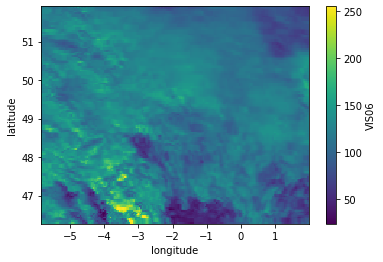

In [14]:
ds = get_satellite_as_xarray(fpath,zone,channel)
ds[channel].plot()

## Function to make a plot with Coastline using basemap 

In [8]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [13]:
#data loading
def plot_figure(fname, title):
    d = np.load(fname, allow_pickle=True)
    d.files  #know the compressed file structure
    data = d['arr_0']
    fig, ax = plt.subplots(1, 1, figsize=(14, 16))
    #background map definition :
    if channel == 'VIS06':
        label_colorbar = 'toa bidirectional reflectance (in %)'
    else:
        label_colorbar = 'toa brightness temperature (in K)'

    try:
        from mpl_toolkits.basemap import Basemap
        m = Basemap(
            epsg=n_epsg,  # Projection type 
            resolution='i',  # resolution of coastlines
            llcrnrlat=lllat,  #  Coordinates of corners 
            urcrnrlat=urlat,
            llcrnrlon=lllon,
            urcrnrlon=urlon)
        #plot the data and the background map (coastlines and borders)
        m.drawcoastlines()
        m.drawcountries()
        img = m.imshow(data, interpolation='none', origin='upper')
    except Exception as e:

        print(
            "Warning : basemap seems to be not installed so no background map is plotted"
        )
        print("Here is the error raise when trying to use basemap %s" % repr(e))
        img = plt.imshow(data, interpolation='none', origin='upper')
    plt.colorbar(img, orientation='horizontal').set_label(label_colorbar)
    plt.title(title)
    plt.show()

Overview of data of type int16

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


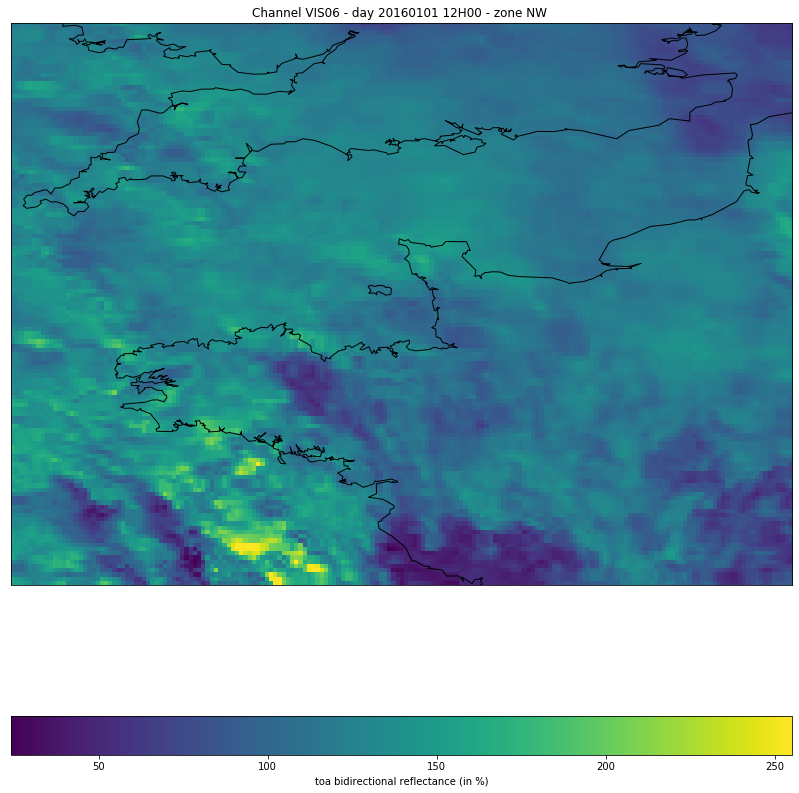

In [14]:
plot_figure(fpath,title)

# Get information of grid 


In [11]:
ds = get_satellite_as_xarray(fpath,zone,channel)

 We can look at coordinates present in xarray file. 
 We can see that *latitude* is **decreasing** and *longitude* is **increaseing** 

In [13]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 133, longitude: 185)
Coordinates:
  * latitude   (latitude) float64 51.9 51.85 51.81 51.77 ... 46.37 46.33 46.29
  * longitude  (longitude) float64 -5.842 -5.799 -5.757 ... 1.893 1.936 1.978
Data variables:
    VIS06      (latitude, longitude) uint8 114 117 121 124 125 ... 91 85 87 98